# Importing and exporting data in Python

In [1]:
#Importing Pandas module
import pandas as pd

In [2]:
#URL where the data is located
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv'

In [3]:
#Read csv - there are similar functions for other formats
df = pd.read_csv(url, header = None)

In [6]:
#Check first couple of rows
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [7]:
#Check bottom rows
df.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


### Adding headers

In [8]:
#The table is missing headers, these are the ones we'll add to it
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cilinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

In [9]:
df.columns = headers 

In [10]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


### Exporting a pandas data frame to CSV

In [11]:
#Getting the current working directory
import os
os.getcwd() 

'/home/claudia/Code/python-data-analysis'

In [12]:
#The path includes the file name that you want to write to
path = "/home/claudia/Code/python-code/used-cars-data.csv"

In [13]:
df.to_csv(path)

# Getting started analyzing data

### Basic insights of the dataset - data types

In [14]:
#Checking the data type of all columns with the method dtypes
#Note that bore is the dimension of an engine, so it shouldn't be an object
#(a string), but a numerical type.
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cilinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### Check the statistical summary

In [ ]:
#Check the distribution of data for each column - quick stats
#Look for extreme outliers and large deviations
df.describe()

In [ ]:
#By default, the describe() method skips columns that are not numeric 
#To include the object columns type:
df.describe(include="all")

#unique - counts distinct objects in column
#top - most frequently occurring object
#freq - # of times the top object appears

In [ ]:
#The  .info() method provides a concise summary of the data frame
df.info()

## Pre-processing Data in Python

Converting or mapping data from the initial "raw" form into another format, in order to prepare the data for further analysis. 
Better known as data cleaning or data wrangling.

Learning objectives:

* Identify and handle missing values - empty data entry.
* Data formating - standardize the values in the same format or unit, or convention.
* Data normalization - different columns of numerical data may have very different ranges and direct comparison is not meaningful. Normalization allows to bring data into a similar range for a more useful comparison. Some techniques: centering/scaling.
* Data binning - binning creates bigger categories from a set of numerical values / useful for comparison.
* Turning categorical values to numeric variables - makes modeling easier.

In [ ]:
#Accessing a column in a data frame - each column is a pandas series
df['symboling']

In [ ]:
#Manipulating dataframes - add 1 to each entry of a column
#Note this won't print the change
df['symboling'] = df['symboling']+1

### Dealing with missing values in Python

* Missing value - When no data value is stored for a particular observation. 
* They usually appear as "?", "N/A", "NaN", 0 or just a blank cell.

Ways to deal with missing values

1. **Check with the data collection source**
Check if the person or group that collected the data can go back and find what the actual value should be. 

2. **Drop the missing values**
Drop the whole variable or just the single data entry with the missing value. *Usually dropping the particular entry is best*

3. **Replace the missing values** 
Better since no data is wasted, however, less accurate since we're guessing.
    * Replace data with the average of similar datapoints (the average of the entire variable. 
    * Replace it by frequency - when the value cannot be averaged (e.g. categorical variables), use the mode (the most frequent value).
    * Replace it based on other functions.
    
4. **Leave it as missing data**

#### Dropping missing values

In [37]:
#dropna() method allows you to choose to drop rows or columns that 
#contain missing values like NaN

df.dropna(axis=0, inplace=True)
#Note that the example doesn't change the data frame, use inplace=True for that

In [36]:
#specify axis = 0 to drop the entire row
#or axis = 1 to drop the entire column
#inplace = True allows the modification to be done on the data set directly, 
#writes the result back into the df
df.dropna(subset=["price"], axis=0, inplace=True)
#Equivalent to:
# df = df.dropna(subset=["price"], axis=0)

True

#### Replacing missing values

In [ ]:
#Replacing missing values with the mean
#To calculate the mean I need the column to be numeric
df["normalized-losses"]=pd.to_numeric(df["normalized-losses"], errors='coerce')

In [ ]:
df.dtypes

In [77]:
#Calculate the mean
mean = df["normalized-losses"].mean()
mean

TypeError: Could not convert ???164164?158?158192192188188????121988111811811814814814814811014513713710110110111078106106858585107??145??104104104113113150150150150129115129115?115118?93939393?142???161161161161153153???125125125137128128128122103128128122103168106106128108108194194231161161??161161??16116116111911915415415474?186?????1501041501041501048383831021021021021028989858587877477819191919191919191168168168168134134134134134134656565656519719790?1221229494949494?256???1037410374103749595959595 to numeric

In [76]:
#Replacing missing values
import numpy as np

df["normalized-losses"].replace(np.nan, mean)

NameError: name 'mean' is not defined

## Data formatting in Python

**Data formatting**
* Data is usually collected from different places and stored in different formats
* Bringing data into a common standard of expression allows users to make meaningful comparisons

Clean the data, make it more clear, easy to aggregate and compare.

In [17]:
#Example converting mpg to the same units (mpg and L/100km to the same unit)
df["city-mpg"] = 235/df["city-mpg"]

In [18]:
#Rename the column
df.rename(columns={'city-mpg':'city-L/100km'}, inplace=True)

In [19]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500


#### Incorrect data type

In [20]:
#The wrong data type is assign to a feature
#In this case the price is a string
df["price"].tail(2)

203    22470
204    22625
Name: price, dtype: object

In [21]:
#The price column has NaNs which will be a problem when using as.type
#In this case is better to use to_numeric to deal with the null values
print (df[ pd.to_numeric(df['price'], errors='coerce').isnull()])

     symboling normalized-losses     make fuel-type aspiration num-of-doors  \
9            0                 ?     audi       gas      turbo          two   
44           1                 ?    isuzu       gas        std          two   
45           0                 ?    isuzu       gas        std         four   
129          1                 ?  porsche       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
9    hatchback          4wd           front        99.5  ...          131   
44       sedan          fwd           front        94.5  ...           90   
45       sedan          fwd           front        94.5  ...           90   
129  hatchback          rwd           front        98.4  ...          203   

     fuel-system  bore  stroke compression-ratio horsepower  peak-rpm  \
9           mpfi  3.13    3.40               7.0        160      5500   
44          2bbl  3.03    3.11               9.6         70      5400   

In [22]:
#To convert data types
#df[["price"]] = df[["price"]].astype(int)
#df.astype({'price': 'int32'}).dtypes
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'].dtypes

dtype('float64')

## Data normalization in Python

### Definition

Uniform the feature value with different range to allow a fair comparison.

E.g. comparing length, width and height.
Check the scale: 
length ranges from [150, 250] - large
width [50-100] - small
height [50-100] - small

Another example, I have a dataset with age and income

<ins>Not normalized</ins>:
* Age and income in different range, [0-100] and [0 - 20,000]
* Hard to compare
* Income will influence the result more, income is about 1000 times larger than age

Let's say we're doing a linear regression, the data biases the linear regression model to weigh income more heavily than age - to avoid this we can normalize these two variables into values that range from zero to one.

<ins>Normalized</ins>:
* Similar value range
* Similar intrinsic influence on analytical model


### Methods for normalizing data

1. **Simple feature scaling**

*xnew = xold/xmax*   - makes the values range from 0 to 1

2. **Min-Max**

*xnew = (xold-xmin)/(xman-xmin)*   - makes the values range from 0 to 1

3. **Z-score or standard score**

*xnew = (xold-mean)/standard-deviation*   - makes the value vary from approx -3 to +3

#### Simple feature scaling

In [ ]:
df["length"] = df["length"]/df["length"].max()

#### Min-Max method

In [ ]:
df["length"] = (df["length"] - df["length"].min())/(df["length"].max() - df["length"].min())

#### Z-score method

In [ ]:
df["length"] = (df["length"] - df["length"].mean())/df["length"].std()

## Binning in Python

* Binning: Grouping values into bins. 
* Converts numeric into categorical variables.
* Sometimes binning can improve the accuracy of the predictive models.
* It can also be used to group a set of numerical values into a smaller number of bins - let's you have a better representation of the distribution.

In [ ]:
#E.g. binning price into three groups: low, medium, and high
#We need 4 numbers as dividers that are equal distance apart
#Use the numpy function "linspace" to return the array bins that
#contains 4 equally spaced numbers over the specified interval.
bins = np.linspace(min(df["price"]), max(df["price"]), 4)
bins

In [ ]:
#Create a list
group_names = ["low", "medium", "high"]

In [ ]:
#The pandas function cut segments and sorts the data into bins
df["price-binned"] = pd.cut(df["price"], bins, labels = group_names, include_lowest = True)

#### Visualizing binned data

In [ ]:
#Make a histogram

## Turning categorical variables into quantitative variables in Python

Problem:

* Most statistical models cannot take in the objects/strings as input - model training only takes numbers as inputs.

Solution:

* Add dummy variables for each unique category
* Assign 0 or 1 in each category - this technique is often called **one-hot encoding**

In [ ]:
#Convert categorical variables to dummy variables (0 or 1)
#The fuel column has only gas and diesel values

#pd.get_dummies(df["fuel"]) gets the fuel column and creates a new 
#table with the gas and diesel with the correct distribution of 0 and 1

# Exploratory Data Analysis

Preliminary step to:
* Summarize main characteristics of the data
* Gain better understanding of the data set
* Uncover relationships between variables
* Extract important variables

Question: 
*What are the characteristics that have the most impact on the car price?*

### Descriptive Statistics

* Describe basic features of data
* Give short summaries about the sample and measures of the data

In [ ]:
#Use the pandas describe() function to get an idea of the distribution
# of the data
#By default NaN values are excluded
df.describe()

In [ ]:
#In case you have categorical variables that can be divided up into
#different categories or groups and have discrete values.
#Summarize the categorical data using the value_counts() method
drive_wheels_count = df["drive-wheels"].value_counts()
drive_wheels_count

In [ ]:
#Rename the drive_wheels_count column
drive_wheels_count.rename({"drive-wheels":"value_count"}, inplace = True)
drive_wheels_count

#### Box Plots

- Great way to visualize numeric data. 
- You can check the median (which represents where the middle data point is).
- The upper quartile (75th percentile).
- The lower quartile (25th percentile).
- The data between the upper and lower quartile represents the interquartile range, IQR.
- You can easily spor outliers and also see the distribution and skewness of the data.

In [ ]:
import seaborn as sns
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)

#### Scatter Plots

1. Each observation represented as a point.
2. Shows the relationship between two variables.
    - The **predictor/independent variable**, variable on the x-axis, is the variable you are using to predict an outcome.
    - The **target variable/dependent**, variable on the y-axis, is the one you are trying to predict
    
Could engine-size possibly predict the price of a car?
*Price is the target variable.*

Text(0, 0.5, 'Price')

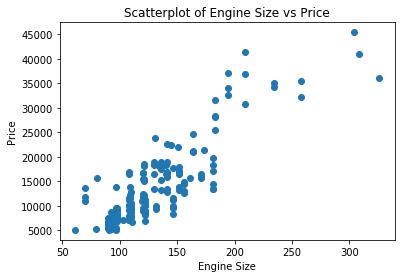

In [67]:
#Label axis and write the correct titles
import matplotlib.pyplot as plt

y = df["price"]
x = df["engine-size"]

plt.scatter(x,y)
plt.title("Scatterplot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

Note that as the engine-size goes up, the price goes up. This gives us an indication that there is a positive linear relationship between these two variables.

### GroupBy in Python

Grouping data

Use Pandas Groupby() method. 
    - It can be applied on categorical variables
    - Group data into categories
    - Can group by a single variable or multiple variables

In [ ]:
#Example, find the average price of vehicles and see how they differ
#between different types of body styles and drive wheels variables.

#Pick the 3 data columns we are interested in.
df_test = df[["drive-wheels", "body-style", "price"]]
df_test

In [ ]:
#Group the reduced data in two variables, calculate the mean
df_grp = df_test.groupby(["drive-wheels", "body-style"], as_index = False).mean()
df_grp

#### Pivot Table

In [ ]:
#Make it easier to read by using the pivot method
#One variable displayed along the columns and the other variable 
#displayed along the rows
df_pivot = df_grp.pivot(index = 'drive-wheels', columns = 'body-style')
df_pivot

#### Heatmap

In [ ]:
#Plot target variable over multiple variables
plt.pcolor(df_pivot, cmap = 'RdBu')
plt.colorbar()
plt.show()

### Correlation

Correlation: Statistical metric that measures to what extent different variables are interdependent.

Correlation doesn't imply causation

In [ ]:
#Correlation between two features - positive linear relationship

#Adding a regression line to a scatterplot
sns.regplot(x = 'engine-size', y='price', data = df)
plt.ylim(0,)

Goal of the plot, see if the engine size has any impact on price. Here there is a positive linear relationship.

In [ ]:
#Correlation between two features - negative linear relationship

sns.regplot(x = 'highway-mpg', y = 'price', data = df)
plt.ylim(0,)

Negative linear relationship, highway-mpg is still a good predictor of price.

In [ ]:
#Weak correlation --- There is an error here. Check.
#sns.regplot(x = 'peak-rpm', y = 'price', data = df)

### Correlation - Statistics

Pearson correlation - Measures the strenght of the correlation between two features:

1. Correlation coefficient
    - Close to +1: large positive relationship
    - Close to -1: large negative relationship
    - Close to 0: no relationship
    
2. p-value - how certain we are about the calculated correlation
   - <0.001: strong certainty in the result
   - <0.05: moderate certainty in the result
   - <0.1 weak certainty in the result
   - >0.1 no certainty in the result
    
Strong correlation when the correlation coefficient is close to 1 or -1 and the p-value is less than 0.001

In [ ]:
from scipy import stats

#df["price"] = pd.to_numeric(df["price"], errors='coerce')
#df["horsepower"] = pd.to_numeric(df["horsepower"], errors='coerce')

#p_coef, p_value = stats.pearsonr(df['horsepower'].dropna(axis = 0), df['price'].dropna(axis = 0))

#Strong possitive correlation
#pearson correlation: 0.81
#p-value: 9.35E-48
#Errors, check

### Correlation- Heatmap

### Analysis of Variance (ANOVA)

We want to analyze a categorical variable and see the correlation among different categories.

- Statistical comparison of groups
- Finding correlation between different groups of a categorical variable
- E.g. average price of different vehicle makes

A plot may show a trend of increades price as we change the vehicle make, but which category in the make has the most and the least impact in the car price prediction? Is the difference significant?

From ANOVA we obtain:
- F-test score: variation between sample group means divided by variation within sample group. 

    A small F implies poor correlation between the variable categories and target value.

    A large F implies strong correlation between variable categories and target variable.

- P-value: confidence degree.

In [ ]:
#ANOVA between "Honda" and "Subaru"
df_anova = df[['make', 'price']]
grouped_anova = df_anova.groupby(["make"])


# The prices between Honda and Subarus are not significantly different
anova_results_1 = stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("subaru")["price"])
anova_results_1

In [ ]:
# The prices between Honda and Jaguar are significantly different
anova_results_1 = stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("jaguar")["price"])
anova_results_1

All in all, we can say that there is a strong correlation between categorical variables and other variables if the ANOVA test gives us a large F-test value and a small p-value.

# Model Development

- Simple and multiple linear regression
- Model evaluation using visualization
- Polynomial regression and pipelines
- R-squared and MSE for n-sample evaluation
- Prediction and decision making

**Question: How can you determine a fair value for a used car?**

<ins>Model Development:</ins>

A model or estimator can be thought as a mathematical equation used to predict a value given one or more other values.
Relating one or more independent variables to dependent variables.
The more relevant data you have the more accurate your model is.

To understand why more data is important, consider the following example:
1. You have 2 almost identical cars, one pink, one red.
2. You want to use your model to determine the price, if the independent variables don't include color, the price predicted will be the same.

## Linear regression and multiple linear regression

- Linear regression will refer to one independent variable to make a prediction.
- Multiple linear regression will refer to multiple independent variables to make a prediction.

#### Simple linear regression

This method helps us understand the relationship between two variables.

1. The predictor (independent) variable-x
2. The target (dependent) variable-y

y = b0 + b1*x

b0: the intercept
b1: the slope

We use **training points to fit our model**. The results of the training point are the parameters. We usually store the data points in two data frames or numpy arrays.

The dependent variable is stored in the data frame or array x, and the target variable in the data frame or array y.

In many cases, many factors influence how much people pay for a car. This uncertainty is taken into account by assuming a small random value is added to the point on the line. This is called noise.

The process:

1. We have a set of training points ---> fit
2. We use the training points to fit or train the model and get parameters.
3. We use the parameters in the model  
4. We have a model: yhat = b0 + b1x ---> predict
5. y hat denotes that the value is an estimate.

The model is not always correct. Compare the predicted value to the actual value. If the model is fine, then the error is due to noise, but there could be other issues.

In [23]:
#Import linear_model from scikit-learn
from sklearn.linear_model import LinearRegression

#Create a linear regression using the constructor
lm = LinearRegression()

In [40]:
#Define the predictor variable and target variable
#Check if nulls: y.isnull().values.any()
x = df[['highway-mpg']] # this method allows you to select multiple columns, it's a dataframe
y = df['price'] # this is only for single columns, it's a pandas series

False

In [41]:
#Use lm.fit(x,y) to fit the model, ie find the parameters b0 and b1
#Remove Nan
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
#Obtain a prediction - the output is an array, same number of samples as
#input x
yhat = lm.predict(x)

In [43]:
#The intercept (b0) is an attribute of the object lm
lm.intercept_

38423.3058581574

In [45]:
#The slope (b1) is an attribute of the object lm
lm.coef_

array([-821.73337832])

In [ ]:
#The relationship between highway-mpg and price is:
# price = 38423.31 - 821.73 * highway-mg

#### Multiple linear regression

This method is used to explain the relationship between:
- One continuous target (y) variable
- Two or more predictors (x) variables

yhat = b0 + b1*x1 + b2*x2 + b3*x3 + ...

b0: intercept

b1: coefficient or parameter of x1, etc

In [64]:
df['curb-weight'].dtypes

dtype('int64')

In [61]:
#Extract the 4 predictor variables and store them in the variable z
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [62]:
#Train the model
lm.fit(z, df['price'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#Obtain a prediction - in this case the input is an array with four
#columns, the number corresponds with the number of samples
#yhat = lm.predict(x)

In [ ]:
#Intercept and coefficients are attributes of the object lm
#Intercept: b0
#lm.intercept_

In [ ]:
#Coefficients (b1, b2, b3, b4)
lm.coef_

### Model evaluation using visualization

#### Regression plot

Regression plots are a good estimate of:
1. The relationship between two variables
2. The strength of the correlation
3. The direction of the relationship (positive or negative)

Regression plots are a combination of:
- A scatterplot where each point represents a different y
- The fitted linear regression line (yhat - repressents the predicted variable)

(0, 48201.09915453565)

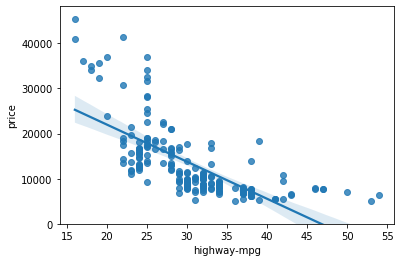

In [68]:
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

#### Residual plot

It represents the error between the predicted and the actual value. 

Take the difference between the predicted and the actual value, plot that difference on the vertical axis with the dependent variable as the horizontal axis. Do this for each sample.

We expect the residual plot to have a zero mean, distributed evenly around the x axis with similar variance, no curvature - the linear model is appropriate.

If there is a curvature:
- The residuals are not randomly spread out around the x-axis
- The linear assumption is incorrect. Nonlinear model may be more appropriate.
- If the variance of the residuals appears to change with x-axis, our model is incorrect.

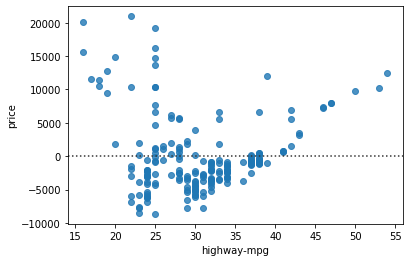

In [71]:
#Use seaborn
sns.residplot(df['highway-mpg'], df['price'])

We see a curvature - the linear model is not correct

#### Distribution plot

It counts the predicted value versus the actual values. This plot is extremely useful for visualizing models with more than one independent variable or feature.

I have y and yhat vs x, translate those points to a ? vs y/yhat.
Count and plot the predicted values (yhat) equal to a given x - And I draw a bar in the other plot. Next x value.

Then we repeat the process for the target values (y).

y and yhat are continuous - a histogram is for discrete values, therefore Pandas converts them to a distribution, the vertical axis is scaled to make the area under the curve = 1.

Compare the distribution plots of y and yhat:
- The fitted values that result from the model (blue)
- The actual values (red)

Where the curves match the results are more accurate.

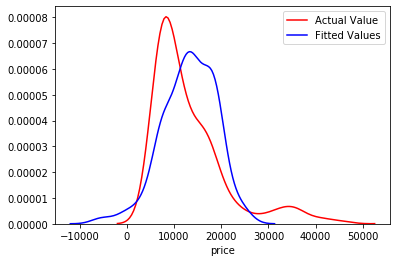

In [74]:
#hist = False because we want a distribution

axl = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(yhat, hist=False, color='b', label='Fitted Values', ax=axl)

### Polinomial Regression and Pipelines

When the linear model is not the best fit for our data. 

We transform the data into a polynomial, then use linear regression to fit the parameter.

Pipelines are a way to simplify your code.

Polinomial regression is a special case of the general LR. It describes curvilinear relationships.

**Curvilinear relationship**: What you get by squaring or setting higher order terms of the predictor variables.

#### Polynomial regression

- Quadratic - 2nd order

    yhat= b0 + b1x1 + b2(x1)^2  
    

- Cubic - 3rd order/the predictor is cubed

    yhat= b0 + b1x1 + b2(x1)^2 + b3(x1)^3
    

- Higher order

     yhat= b0 + b1x1 + b2(x1)^2 + b3(x1)^3 + ..

The degree of the regression makes a big difference and can result in a better fit if you pick the right value. The relationship between the variable and the parameter is always linear.

In [82]:
#Polynomial of 3rd order
f = np.polyfit(x,y,3)
p = np.poly1d(f)

print(p) # Check results

           3         2
-0.006641 x + 3.645 x - 433.4 x + 2.208e+04


In [88]:
#Numpy's polyfit function cannot perform a multi-dimensional 
#polynomial linear regression

#Use the "preprocessing" library in scikit-learn to create a 
#polynomial features object

from sklearn.preprocessing import PolynomialFeatures

#The constructor takes the degree of the polynomial as a parameter
pr = PolynomialFeatures(degree=2)

#Transform the features into a polynomial feature with the fit_transform method
pr.fit_transform([1,2], include_bias=False)

# CHeck ERRORS

TypeError: fit() got an unexpected keyword argument 'include_bias'

In [90]:
#Preprocessing
# Normalize the each feature simultaneously

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

scale.fit(x_data[['horsepower', 'highway-mpg']])

x_scale = scale.transform(x_data[['horsepower', 'highway-mpg']])

# Fix errors

NameError: name 'x_data' is not defined

#### Pipelines

There are many steps to get a prediction:
1. Normalization
2. Polynomial transform
3. Linear regression

In [91]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [93]:
#Create a list of tuples
#The first element in the tuple contains the name of the estimator model
#The second element contains the model constructor
input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2), ('mode', LinearRegression()))]

In [95]:
#We input the list in the pipeline constructor, now we have a pipeline object
pipe = Pipeline(input)

In [96]:
#Train the pipeline by applying the train method to the pipeline object
pipe.fit(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y)

ValueError: too many values to unpack (expected 2)

In [ ]:
#Make a prediction
yhat = pipe.predict(x[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

### Measure for in-sample evaluation

We evaluated the model by using visualization, now let's do it numerically.

Numerically determine how good the model fits on dataset

Determine the fit of the model by using the:
- Mean Square Error (MSE) 
    1. Find the difference between the actual value y and the predicted value yhat and square it.
    2. Take the mean or average of all the errors by adding them all together and dividing by the number of samples
    
- R-squared
    The coefficient of determination or R-squared
    Is a measure to determine how close the data is to the fitted regression line.
    R^2: the percentage of variation of the target variable (y) that is explained by the linear model.
    It's like comparing a regression model to a simple model, ie the mean of the data points. If the variable x is a good predictor, out model should perform much better than just the mean.
    
    R^2 = (1-(MSE of regression line/MSE of the average of the data (y)))
    
Generally the values of the MSE are between 0 and 
R-squared is usually between 0 and 1
If R-squared is negative, it can be due to over fitting

In [98]:
#MSE

from sklearn.metrics import mean_squared_error

mean_squared_error(df['price'], y_predict_simple_fit)

NameError: name 'y_predict_simple_fit' is not defined

In [101]:
#Calculate R-squared
x = df[['highway-mpg']]
y = df['price']

lm.fit(x,y)

#Approximately 49% of the variation of the price is explained by this 
#simple linear model
lm.score(x,y)

0.4965911884339176

### Prediction and Decision Making

#### Decision making - determining a good model fit

To determine final best fit, we look at a combination of:
- Do the predicted values make sense?
- Visualization
- NUmerical measures for evaluation
- Comparing models

In [104]:
#First - train the model
#lm.fit(df['highway-mpg', df['price']])

In [105]:
#Predict the price of a car with 30 highway-mpg
#Is the value logical? not negative? not extremely high?
#lm.predict(np.array(30.0).reshape(-1,1))

In [106]:
#Check coefficients
#The slope ---  an increase of one unit in highway miles per gallon
#implies a decrease of approx $821 in price

#price = 38,423 - 821*highway-mpg

#lm.coef_

In [111]:
#Generate a sequence of values in a specified range
import numpy as np

#Use the arrange funtion to generate a sequence from 1 to 100
#first parameter: start of sequence
#second parameter: end +1
#third parameter: step size
new_input = np.arange(1, 101, 1).reshape(-1,1)

In [112]:
#Use the output to predict new values
yhat = lm.predict(new_input)

#### Visualization

Simply visualize your data with a regression
Check the residuals plot
Check the distribution plot
Check the MSE - plot the sample data as dots, and the blue line as the predicted value - as the MSE increases, the target gets further from the predicted points
Check R-squared - as R squared closer to 0 is not good. Some authors suggest the value should be equal to ot greater than 0.1

#### Comparing MLR and SLR

*Is a lower MSE always implying a better fit? Not necessarily.*

MSE for an MLR model will be smaller than the MSE for an SLR model, since the errors of the data will decrease when more variables are included in the model.

Polynomial regression will also have a smaller MSE than regular regression. A similar inverse relationship holds for R-squared.